In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
BankChurners = "BankChurners.csv"
df = pd.read_csv(BankChurners)
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [2]:
# Get all Attrited Customers
atc_df = df[df['Attrition_Flag'].str.contains('Attrited Customer')]
atc_df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,...,1438.3,0,1438.3,1.047,692,16,0.600,0.000,0.99616,0.003836
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,...,7882.0,605,7277.0,1.052,704,16,0.143,0.077,0.99780,0.002197
51,779471883,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,...,1438.3,808,630.3,0.997,705,19,0.900,0.562,0.99028,0.009720
54,714374133,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,...,15769.0,0,15769.0,1.041,602,15,0.364,0.000,0.99671,0.003294
61,712030833,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,...,34516.0,0,34516.0,0.763,691,15,0.500,0.000,0.99823,0.001771


In [3]:
# Copy attrited customers df
cr_df = df.copy()

# Calculate overall churn rate
churned_customers = cr_df[cr_df['Attrition_Flag'] == 'Attrited Customer']
churn_rate = len(churned_customers) / len(cr_df) * 100
print(f"Overall Churn Rate: {churn_rate:.2f}%")

Overall Churn Rate: 16.07%


In [4]:
# Define the age groups
bins = [18, 29, 39, 49, 59, float('inf')]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']

# Create new column with age groups
cr_df['Age_Group'] = pd.cut(cr_df['Customer_Age'], bins=bins, labels=labels)

# Filter out zero-length arrays
cr_df = cr_df.loc[cr_df['Attrition_Flag'].notnull()]

# Group by age group and calculate churn rate
churn_rate_by_age = cr_df.groupby('Age_Group')['Attrition_Flag'].apply(lambda x: ((x == 'Attrited Customer').sum() / len(x) * 100) if len(x) > 0 else np.nan).reset_index(name='Churn_Rate_Percent')
print('Churn Rate by Age Group:')
print(churn_rate_by_age)

Churn Rate by Age Group:
  Age_Group  Churn_Rate_Percent
0     18-29            8.717949
1     30-39           14.177078
2     40-49           16.926113
3     50-59           16.877919
4       60+           13.345865


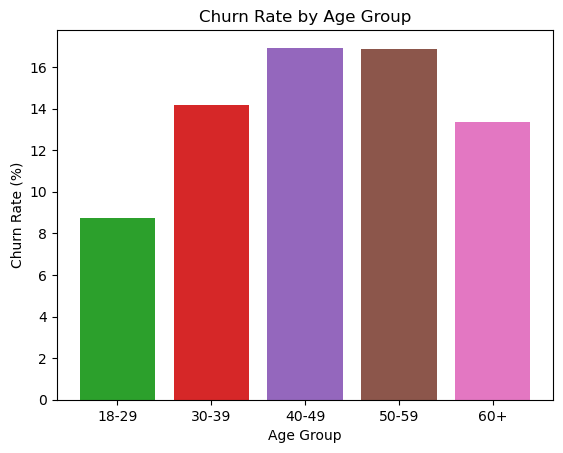

In [5]:
# Create bar chart
plt.bar(churn_rate_by_age['Age_Group'], churn_rate_by_age['Churn_Rate_Percent'], color=['#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'])

# Add title and axis labels
plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate (%)')

# Show plot
plt.show()

In [6]:
# Calculate churn rate by Gender
churn_rate_by_gender = cr_df.groupby('Gender')['Attrition_Flag']\
    .apply(lambda x: ((x == 'Attrited Customer').sum() / len(x) * 100) if len(x) > 0 else np.nan)\
    .reset_index(name='Churn_Rate_Percent')
print('Churn Rate by Gender:')
print(churn_rate_by_gender)

Churn Rate by Gender:
  Gender  Churn_Rate_Percent
0      F           17.357223
1      M           14.615223


In [7]:
# Define the age groups
bins = [18, 29, 39, 49, 59, float('inf')]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']

# Create new column with age groups
cr_df['Age_Group'] = pd.cut(cr_df['Customer_Age'], bins=bins, labels=labels)

# Filter out zero-length arrays
cr_df = cr_df.loc[cr_df['Attrition_Flag'].notnull()]

# Group by age group and gender and calculate churn rate
churn_rate_by_age_gender = cr_df.groupby(['Age_Group', 'Gender'])['Attrition_Flag'].apply(lambda x: ((x == 'Attrited Customer').sum() / len(x) * 100) if len(x) > 0 else np.nan).reset_index(name='Churn_Rate_Percent')

print('Churn Rate by Age Group and Gender:')
print(churn_rate_by_age_gender)

Churn Rate by Age Group and Gender:
  Age_Group Gender  Churn_Rate_Percent
0     18-29      F            9.677419
1     18-29      M            7.843137
2     30-39      F           15.794979
3     30-39      M           12.429379
4     40-49      F           18.298755
5     40-49      M           15.388192
6     50-59      F           18.097591
7     50-59      M           15.445975
8       60+      F           12.857143
9       60+      M           13.888889


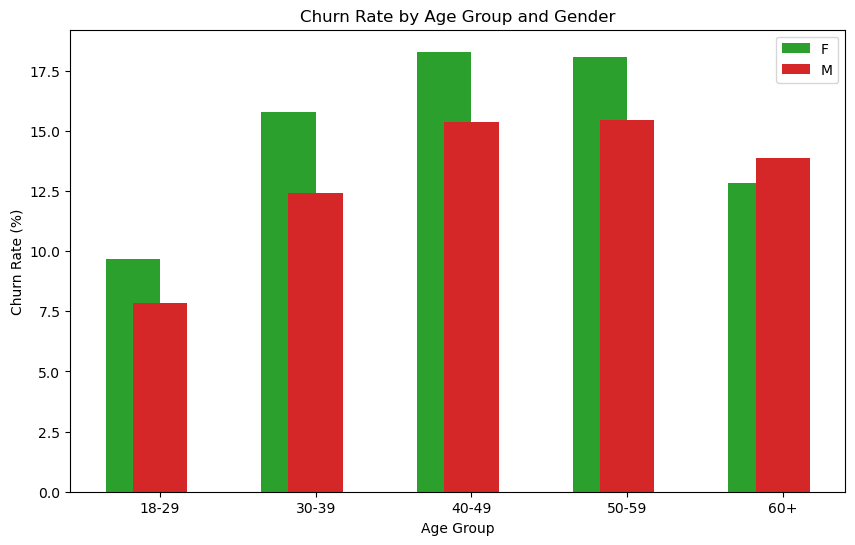

In [8]:
# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(10,6))

# Define the color palette
colors = ['#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Create the grouped bar chart
width = 0.35  # the width of the bars
x = np.arange(len(labels))  # the label locations
for i, gender in enumerate(churn_rate_by_age_gender['Gender'].unique()):
    ax.bar(x - width/2 + i*width/len(churn_rate_by_age_gender['Gender'].unique()), churn_rate_by_age_gender[churn_rate_by_age_gender['Gender']==gender]['Churn_Rate_Percent'], width, label=gender, color=colors[i])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Age Group')
ax.set_ylabel('Churn Rate (%)')
ax.set_title('Churn Rate by Age Group and Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [9]:
# Calculate churn rate by Education Level
churn_rate_by_edu = cr_df.groupby('Education_Level')['Attrition_Flag']\
    .apply(lambda x: ((x == 'Attrited Customer').sum() / len(x) * 100) if len(x) > 0 else np.nan)\
    .reset_index(name='Churn_Rate_Percent')
print('Churn Rate by Education Level:')
print(churn_rate_by_edu)

Churn Rate by Education Level:
  Education_Level  Churn_Rate_Percent
0         College           15.202369
1       Doctorate           21.064302
2        Graduate           15.569054
3     High School           15.201192
4   Post-Graduate           17.829457
5      Uneducated           15.938130
6         Unknown           16.853193


In [10]:
# Group by age group and education level, and calculate churn rate
churn_rate_by_age_edu = cr_df.groupby(['Age_Group', 'Education_Level'])['Attrition_Flag']\
    .apply(lambda x: ((x == 'Attrited Customer').sum() / len(x) * 100) if len(x) > 0 else np.nan)\
    .reset_index(name='Churn_Rate_Percent')
print('Churn Rate by Age Group and Education Level:')
for age_group in labels:
    print('\n' + age_group + ':\n')
    print(churn_rate_by_age_edu[churn_rate_by_age_edu['Age_Group'] == age_group])

Churn Rate by Age Group and Education Level:

18-29:

  Age_Group Education_Level  Churn_Rate_Percent
0     18-29         College            4.000000
1     18-29       Doctorate                 NaN
2     18-29        Graduate            7.547170
3     18-29     High School           17.073171
4     18-29   Post-Graduate           11.764706
5     18-29      Uneducated            7.692308
6     18-29         Unknown            3.030303

30-39:

   Age_Group Education_Level  Churn_Rate_Percent
7      30-39         College           15.544041
8      30-39       Doctorate           11.428571
9      30-39        Graduate           14.853195
10     30-39     High School           11.375661
11     30-39   Post-Graduate           16.831683
12     30-39      Uneducated           12.734082
13     30-39         Unknown           16.996047

40-49:

   Age_Group Education_Level  Churn_Rate_Percent
14     40-49         College           16.407982
15     40-49       Doctorate           25.462963
16   

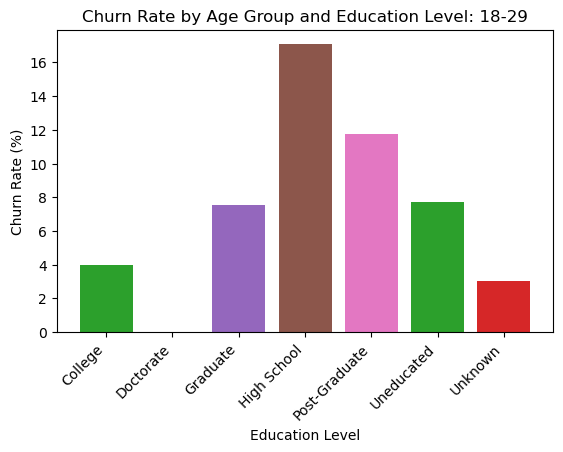

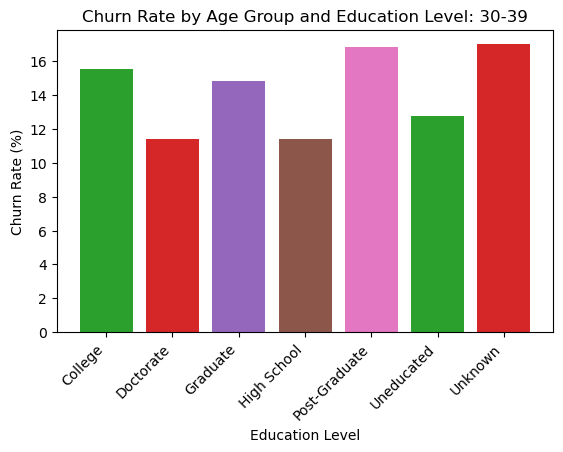

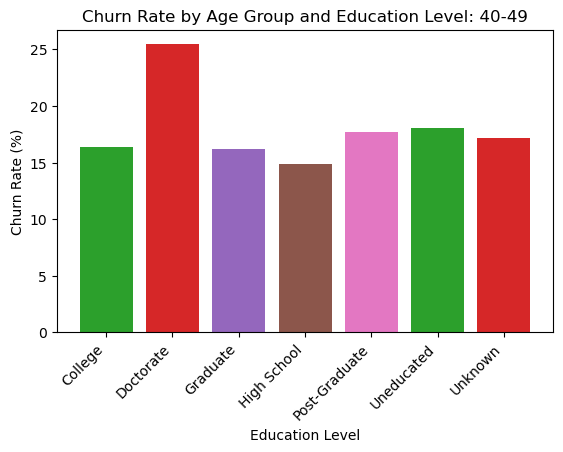

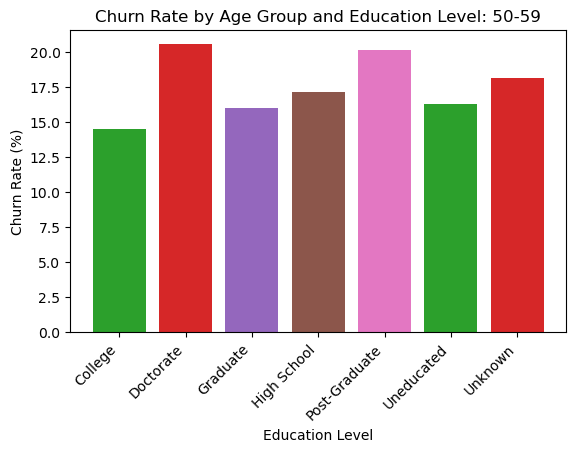

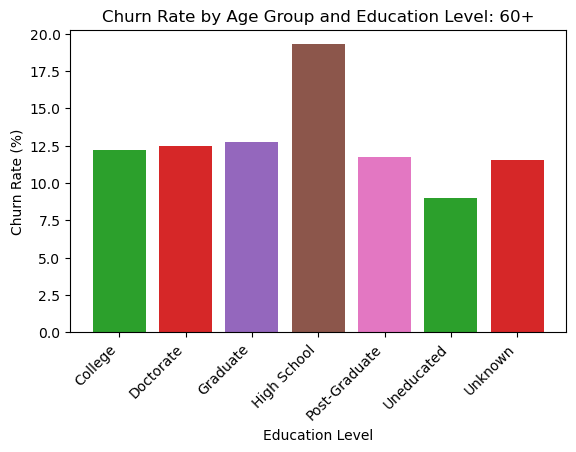

In [11]:
# Define the color palette
colors = ['#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Create a bar graph for each age group
for age_group in labels:
    churn_rates = churn_rate_by_age_edu[churn_rate_by_age_edu['Age_Group'] == age_group]
    education_levels = churn_rates['Education_Level']
    rates = churn_rates['Churn_Rate_Percent']
    fig, ax = plt.subplots()
    plt.xticks(rotation=45, ha='right')
    plt.subplots_adjust(bottom=0.25)
    ax.bar(education_levels, rates, color=colors)
    ax.set_xlabel('Education Level')
    ax.set_ylabel('Churn Rate (%)')
    ax.set_title('Churn Rate by Age Group and Education Level: ' + age_group)
    plt.show()

In [12]:
# Calculate churn rate by Income Category
churn_rate_by_income_category = cr_df.groupby('Income_Category')['Attrition_Flag']\
    .apply(lambda x: ((x == 'Attrited Customer').sum() / len(x) * 100) if len(x) > 0 else np.nan)\
    .reset_index(name='Churn_Rate_Percent')
print('Churn Rate by Income Category:')
print(churn_rate_by_income_category)

Churn Rate by Income Category:
  Income_Category  Churn_Rate_Percent
0         $120K +           17.331499
1     $40K - $60K           15.139665
2     $60K - $80K           13.480742
3    $80K - $120K           15.765472
4  Less than $40K           17.186184
5         Unknown           16.816547


In [13]:
# Define the age groups
bins = [18, 29, 39, 49, 59, float('inf')]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']

# Create new column with age groups
cr_df['Age_Group'] = pd.cut(cr_df['Customer_Age'], bins=bins, labels=labels)

# Filter out zero-length arrays
cr_df = cr_df.loc[cr_df['Attrition_Flag'].notnull()]

# Group by age group and calculate churn rate
churn_rate_by_age = cr_df.groupby('Age_Group')['Attrition_Flag']\
    .apply(lambda x: ((x == 'Attrited Customer').sum() / len(x) * 100) if len(x) > 0 else np.nan)\
    .reset_index(name='Churn_Rate_Percent')

# Calculate churn rate by Income Category and Age Group
churn_rate_by_income_age = cr_df.groupby(['Age_Group', 'Income_Category'])['Attrition_Flag']\
    .apply(lambda x: ((x == 'Attrited Customer').sum() / len(x) * 100) if len(x) > 0 else np.nan)\
    .reset_index(name='Churn_Rate_Percent')

# Print churn rate by age group and income category
print('Churn Rate by Income Category and Age Group:')
for age_group in labels:
    print(f'Age Group: {age_group}\n')
    print(churn_rate_by_income_age.loc[churn_rate_by_income_age['Age_Group'] == age_group], '\n')

Churn Rate by Income Category and Age Group:
Age Group: 18-29

  Age_Group Income_Category  Churn_Rate_Percent
0     18-29         $120K +           33.333333
1     18-29     $40K - $60K            6.976744
2     18-29     $60K - $80K           25.000000
3     18-29    $80K - $120K            0.000000
4     18-29  Less than $40K            8.988764
5     18-29         Unknown            2.631579 

Age Group: 30-39

   Age_Group Income_Category  Churn_Rate_Percent
6      30-39         $120K +           20.202020
7      30-39     $40K - $60K           13.352273
8      30-39     $60K - $80K           10.687023
9      30-39    $80K - $120K           10.687023
10     30-39  Less than $40K           16.163142
11     30-39         Unknown           15.196078 

Age Group: 40-49

   Age_Group Income_Category  Churn_Rate_Percent
12     40-49         $120K +           15.328467
13     40-49     $40K - $60K           17.132442
14     40-49     $60K - $80K           13.900709
15     40-49    $80K -

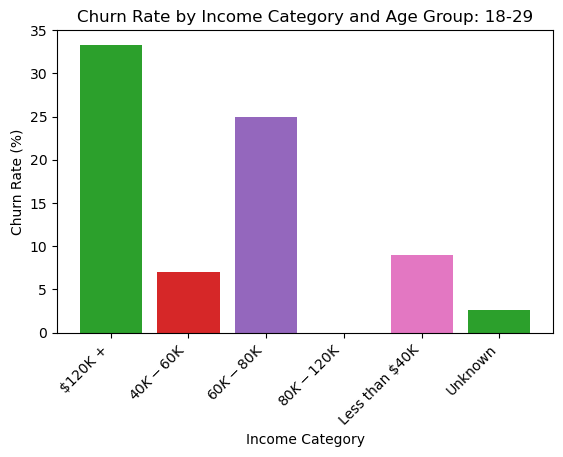

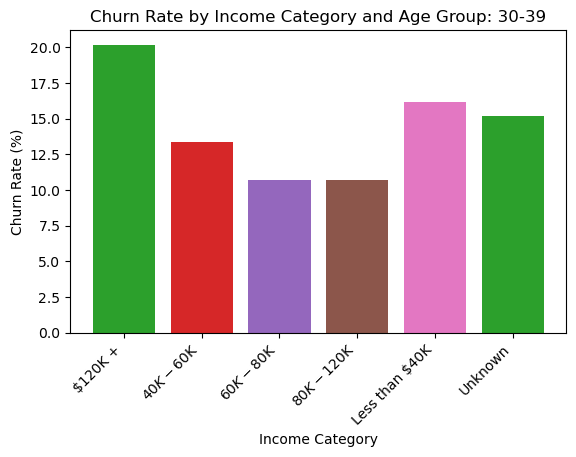

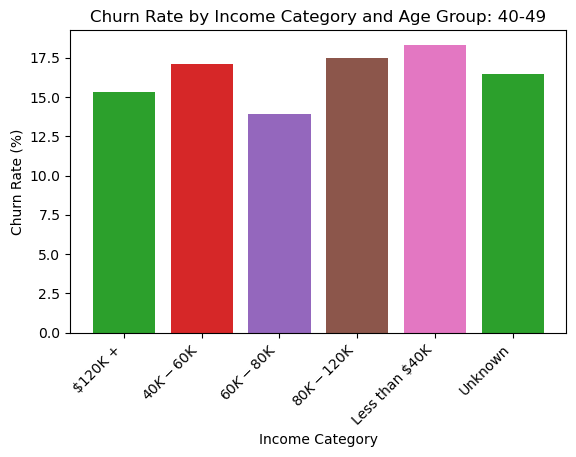

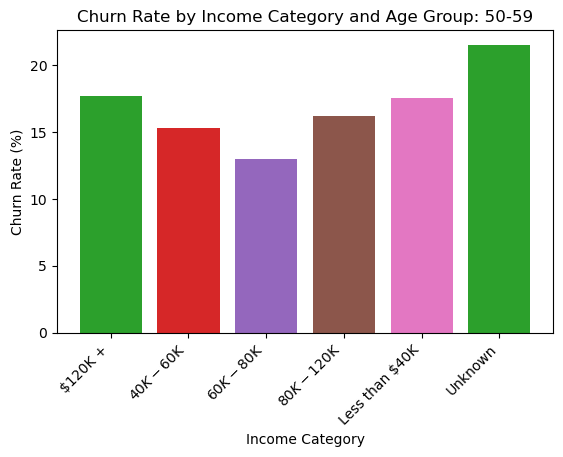

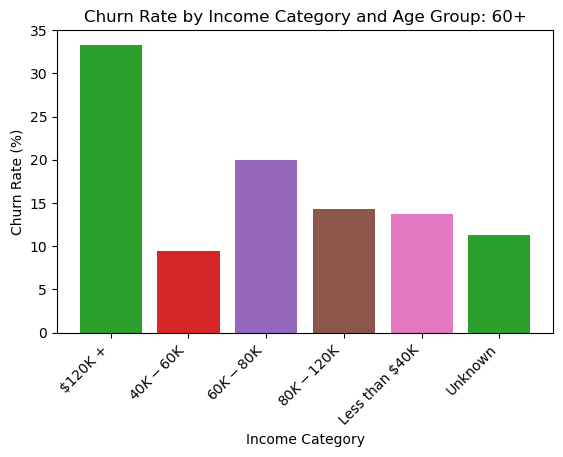

In [14]:
# Define the color palette
colors = ['#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Create a bar graph for each age group
for age_group in labels:
    churn_rates = churn_rate_by_income_age[churn_rate_by_income_age['Age_Group'] == age_group]
    income_categories = churn_rates['Income_Category']
    rates = churn_rates['Churn_Rate_Percent']
    fig, ax = plt.subplots()
    plt.xticks(rotation=45, ha='right')
    plt.subplots_adjust(bottom=0.25)
    ax.bar(income_categories, rates, color=colors)
    ax.set_xlabel('Income Category')
    ax.set_ylabel('Churn Rate (%)')
    ax.set_title('Churn Rate by Income Category and Age Group: ' + age_group)
    plt.show()

In [15]:
# Calculate churn rate by Card Category
churn_rate_by_card_category = cr_df.groupby('Card_Category')['Attrition_Flag']\
    .apply(lambda x: ((x == 'Attrited Customer').sum() / len(x) * 100) if len(x) > 0 else np.nan)\
    .reset_index(name='Churn_Rate_Percent')
print('Churn Rate by Income Category:')
print(churn_rate_by_card_category)

Churn Rate by Income Category:
  Card_Category  Churn_Rate_Percent
0          Blue           16.097923
1          Gold           18.103448
2      Platinum           25.000000
3        Silver           14.774775


In [16]:
# Define the age groups
bins = [18, 29, 39, 49, 59, float('inf')]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']

# Create new column with age groups
cr_df['Age_Group'] = pd.cut(cr_df['Customer_Age'], bins=bins, labels=labels)

# Filter out zero-length arrays
cr_df = cr_df.loc[cr_df['Attrition_Flag'].notnull()]

# Group by age group and calculate churn rate
churn_rate_by_age = cr_df.groupby('Age_Group')['Attrition_Flag']\
    .apply(lambda x: ((x == 'Attrited Customer').sum() / len(x) * 100) if len(x) > 0 else np.nan)\
    .reset_index(name='Churn_Rate_Percent')

# Calculate churn rate by Card Category and Age Group
churn_rate_by_card_age = cr_df.groupby(['Age_Group', 'Card_Category'])['Attrition_Flag']\
    .apply(lambda x: ((x == 'Attrited Customer').sum() / len(x) * 100) if len(x) > 0 else np.nan)\
    .reset_index(name='Churn_Rate_Percent')

# Print churn rate by Card Category and Age Group
print('\nChurn Rate by Card Category and Age Group:\n')
for age_group in labels:
    churn_rate_by_age_group = churn_rate_by_card_age[churn_rate_by_card_age['Age_Group'] == age_group]
    print(age_group + ':\n')
    print(churn_rate_by_age_group)
    print('\n')


Churn Rate by Card Category and Age Group:

18-29:

  Age_Group Card_Category  Churn_Rate_Percent
0     18-29          Blue             9.23913
1     18-29          Gold             0.00000
2     18-29      Platinum                 NaN
3     18-29        Silver             0.00000


30-39:

  Age_Group Card_Category  Churn_Rate_Percent
4     30-39          Blue           14.087760
5     30-39          Gold           20.000000
6     30-39      Platinum            0.000000
7     30-39        Silver           14.772727


40-49:

   Age_Group Card_Category  Churn_Rate_Percent
8      40-49          Blue           17.263610
9      40-49          Gold           20.895522
10     40-49      Platinum           18.181818
11     40-49        Silver           11.186441


50-59:

   Age_Group Card_Category  Churn_Rate_Percent
12     50-59          Blue           16.513437
13     50-59          Gold           12.000000
14     50-59      Platinum           37.500000
15     50-59        Silver        

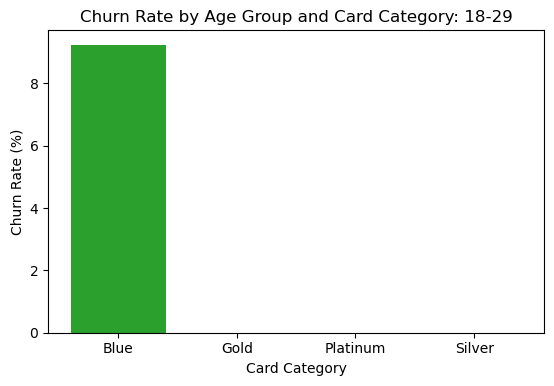

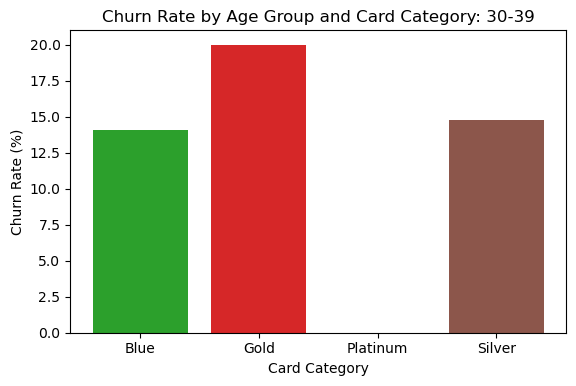

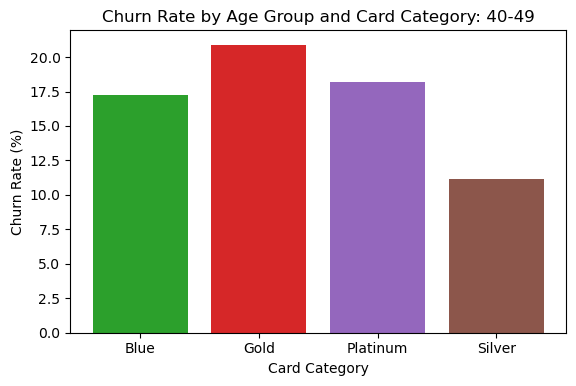

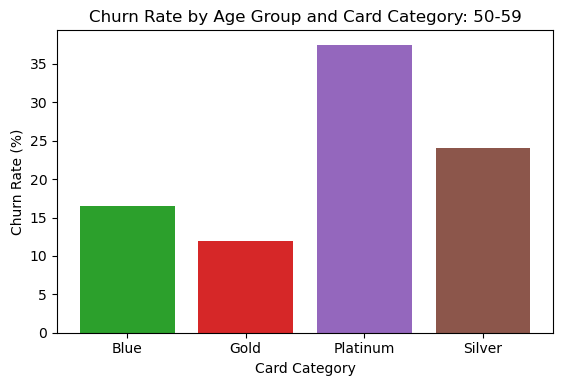

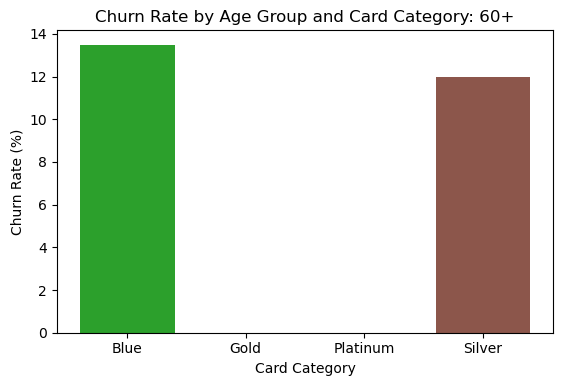

In [17]:
# Define the color palette
colors = ['#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Create a bar graph for each age group
for age_group in labels:
    churn_rates = churn_rate_by_card_age[churn_rate_by_card_age['Age_Group'] == age_group]
    card_categories = churn_rates['Card_Category']
    rates = churn_rates['Churn_Rate_Percent']
    fig, ax = plt.subplots()
    plt.xticks(rotation=0)
    plt.subplots_adjust(bottom=0.25)
    ax.bar(card_categories, rates, color=colors)
    ax.set_xlabel('Card Category')
    ax.set_ylabel('Churn Rate (%)')
    ax.set_title('Churn Rate by Age Group and Card Category: ' + age_group)
    plt.show()

In [18]:
# Create new column with month groups
cr_df['Month_Group'] = pd.cut(cr_df['Months_on_book'], bins=[0, 20, 35, 50, float('inf')], labels=['0-19', '20-34', '35-49', '50+'])

# Filter out zero-length arrays
cr_df = cr_df.loc[cr_df['Attrition_Flag'].notnull()]

# Group by month group and calculate churn rate
churn_rate_by_month = cr_df.groupby('Month_Group')['Attrition_Flag'].apply(lambda x: ((x == 'Attrited Customer').sum() / len(x) * 100) if len(x) > 0 else np.nan).reset_index(name='Churn_Rate_Percent')
print('Churn Rate by Month Group:')
print(churn_rate_by_month)

Churn Rate by Month Group:
  Month_Group  Churn_Rate_Percent
0        0-19           14.621410
1       20-34           14.945891
2       35-49           16.895209
3         50+           14.832536


In [19]:
# Define the age groups
bins = [18, 29, 39, 49, 59, float('inf')]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']

# Create new column with age groups
cr_df['Age_Group'] = pd.cut(cr_df['Customer_Age'], bins=bins, labels=labels)

# Filter out zero-length arrays
cr_df = cr_df.loc[cr_df['Attrition_Flag'].notnull()]

# Group by age group and calculate churn rate
churn_rate_by_age = cr_df.groupby('Age_Group')['Attrition_Flag'].apply(lambda x: ((x == 'Attrited Customer').sum() / len(x) * 100) if len(x) > 0 else np.nan).reset_index(name='Churn_Rate_Percent')

# Calculate churn rate by Months on book Category and Age Group
churn_rate_by_book_age = cr_df.groupby(['Age_Group', 'Month_Group'])['Attrition_Flag'].apply(lambda x: ((x == 'Attrited Customer').sum() / len(x) * 100) if len(x) > 0 else np.nan).reset_index(name='Churn_Rate_Percent')

# Print churn rate by Months on book Category and Age Group
print('\nChurn Rate by Months on book Category and Age Group:')
for age in labels:
    print('\n' + age + ':\n')
    df = churn_rate_by_book_age[churn_rate_by_book_age['Age_Group'] == age]
    if df.empty:
        print('No data available')
    else:
        print(df)


Churn Rate by Months on book Category and Age Group:

18-29:

  Age_Group Month_Group  Churn_Rate_Percent
0     18-29        0-19            9.677419
1     18-29       20-34            4.545455
2     18-29       35-49            8.163265
3     18-29         50+                 NaN

30-39:

  Age_Group Month_Group  Churn_Rate_Percent
4     30-39        0-19           16.806723
5     30-39       20-34           12.096106
6     30-39       35-49           18.939394
7     30-39         50+                 NaN

40-49:

   Age_Group Month_Group  Churn_Rate_Percent
8      40-49        0-19           19.047619
9      40-49       20-34           16.691654
10     40-49       35-49           17.093344
11     40-49         50+                 NaN

50-59:

   Age_Group Month_Group  Churn_Rate_Percent
12     50-59        0-19                 NaN
13     50-59       20-34           15.873016
14     50-59       35-49           16.791604
15     50-59         50+           19.858156

60+:

   Age_Group 

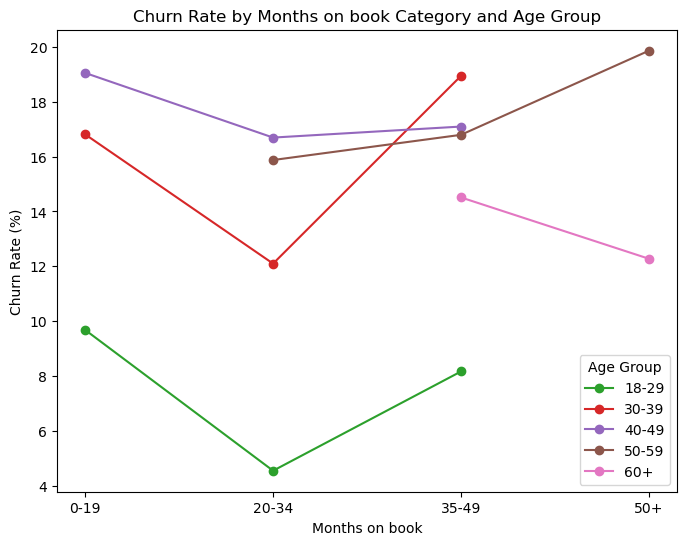

In [20]:
# Define the age groups and month groups
age_bins = [18, 29, 39, 49, 59, float('inf')]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60+']
#month_bins = [0, 24, 48, 72, 96, float('inf')]
#month_labels = ['0-24', '24-48', '48-72', '72-96', '96+']
month_bins = [0, 19, 34, 49, float('inf')]
month_labels = ['0-19', '20-34', '35-49', '50+']

# Plot churn rate by Months on book Category and Age Group
fig, ax = plt.subplots(figsize=(8, 6))
for i, age in enumerate(age_labels):
    df = churn_rate_by_book_age[churn_rate_by_book_age['Age_Group'] == age]
    if not df.empty:
        ax.plot(df['Month_Group'], df['Churn_Rate_Percent'], marker='o', color=colors[i], label=age)
ax.set_xlabel('Months on book')
ax.set_ylabel('Churn Rate (%)')
ax.set_title('Churn Rate by Months on book Category and Age Group')
ax.legend(title='Age Group', loc='best')

plt.show()

In [21]:
# Get all Attrited Customers
atc_df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,...,1438.3,0,1438.3,1.047,692,16,0.600,0.000,0.99616,0.003836
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,...,7882.0,605,7277.0,1.052,704,16,0.143,0.077,0.99780,0.002197
51,779471883,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,...,1438.3,808,630.3,0.997,705,19,0.900,0.562,0.99028,0.009720
54,714374133,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,...,15769.0,0,15769.0,1.041,602,15,0.364,0.000,0.99671,0.003294
61,712030833,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,...,34516.0,0,34516.0,0.763,691,15,0.500,0.000,0.99823,0.001771


In [22]:
# Copy attrited customers df
age_group_df = atc_df.copy()

# Create new column with age groups
age_group_df.loc[:, 'Age_Group'] = pd.cut(age_group_df['Customer_Age'], bins=bins, labels=labels)

# Count the number of customers in each age group
group_counts = age_group_df['Age_Group'].value_counts(sort=False)
group_counts

18-29     17
30-39    261
40-49    772
50-59    506
60+       71
Name: Age_Group, dtype: int64

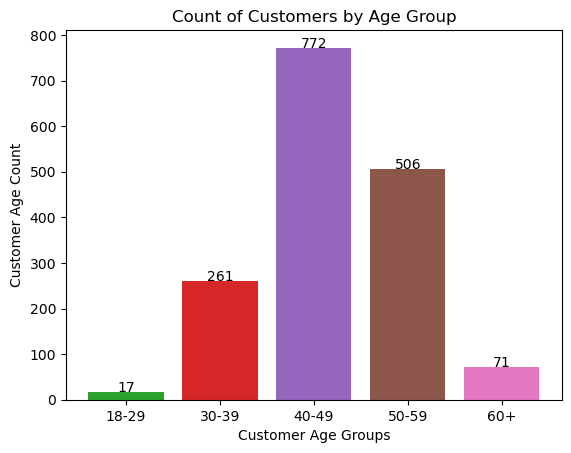

In [23]:
# Define colors for each age group
colors = ['#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Create bar chart
fig, ax = plt.subplots()
ax.bar(group_counts.index, group_counts.values, color=colors)
ax.set_title('Count of Customers by Age Group')
ax.set_xlabel('Customer Age Groups')
ax.set_ylabel('Customer Age Count')

# Add labels to bars
for i, v in enumerate(group_counts.values):
    ax.text(i, v+0.5, str(v), ha='center')

plt.show()

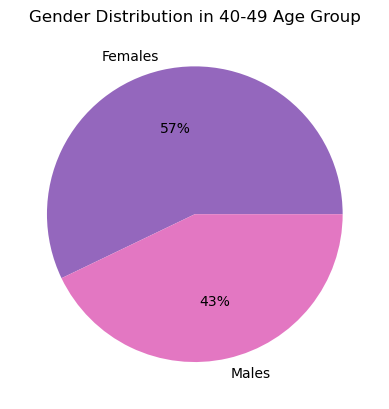

In [24]:
# Filter age_group_df for only customers in 40-49 age group
age_group_40_49_df = age_group_df[age_group_df['Age_Group'] == '40-49']

# Count number of males and females in the 40-49 age group
gender_counts = age_group_40_49_df['Gender'].value_counts()
gender_counts

# Create pie chart
fig, ax = plt.subplots()
ax.pie(gender_counts.values, labels=['Females', 'Males'], colors=['#9467bd', '#e377c2'], autopct='%1.0f%%')
ax.set_title('Gender Distribution in 40-49 Age Group')

plt.show()

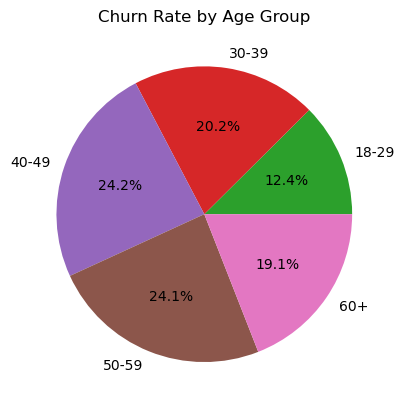

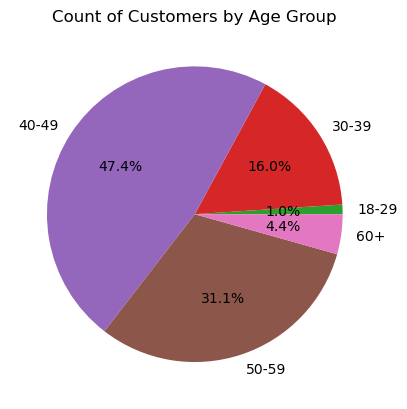

In [25]:
# Create a pie chart
fig, ax = plt.subplots()
ax.pie(churn_rate_by_age['Churn_Rate_Percent'], labels=churn_rate_by_age['Age_Group'], colors=colors, autopct='%1.1f%%')
ax.set_title('Churn Rate by Age Group')

plt.show()

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(group_counts.values, labels=group_counts.index, colors=colors, autopct='%1.1f%%')
ax.set_title('Count of Customers by Age Group')

plt.show()